Установим все необходимые зависимости

In [1]:
import requests
import pandas as pd
import seaborn as sns

Спарсим данные со страницы Вали Карнавал ВКонтакте https://vk.com/karna.val.music

In [2]:
def get_data(TOKEN_USER, VERSION, DOMAIN, count_per_request, total_posts):
  data = []
  # через api vk вызываем статистику постов
  for offset in range(0, total_posts, count_per_request):
      response = requests.get('https://api.vk.com/method/wall.get',
      params={'access_token': TOKEN_USER,
              'v': VERSION,
              'domain': DOMAIN,
              'count': count_per_request,
              'offset': offset,
              'filter': str('owner')})

      tmp = response.json()['response']['items']
      data.extend(tmp)
  #print(data)


  # считаем сколько фото у поста, заводи все в df
  date = []
  like = []

  for post in data:
      date.append(post['date'])
      like.append(post['likes']['count'])

  df = pd.DataFrame(
      {'date': date,
      'like.count': like,
      })

  df['date'] = pd.to_datetime(df['date'], unit='s')
  return df

TOKEN_USER = "User token"
VERSION = 5.131
DOMAIN = "karna.val.music"
count_per_request = 100
total_posts = 1257

df_likes = get_data(TOKEN_USER, VERSION, DOMAIN, count_per_request, total_posts)

print(df_likes)

                    date  like.count
0    2023-07-19 09:58:06       24928
1    2023-07-31 10:37:45        2461
2    2023-07-29 16:26:14       20830
3    2023-07-29 12:25:30       12991
4    2023-07-29 10:18:03       18639
...                  ...         ...
1258 2020-06-15 12:16:51        5789
1259 2020-06-15 12:15:12        6661
1260 2020-06-15 12:01:25        5095
1261 2020-06-15 11:53:17        5385
1262 2020-06-14 18:06:40        7292

[1263 rows x 2 columns]


Посмотрим на распределение лайков

<Axes: >

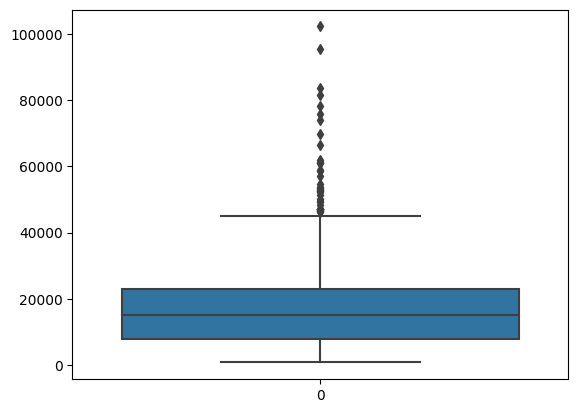

In [3]:
sns.boxplot(df_likes['like.count'])

Удалим все посты в которых количество лайков больше 90 000 во избежании попадания постов с накрученными лайками

<Axes: >

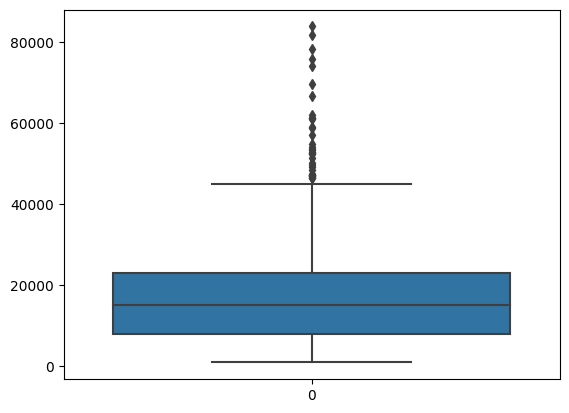

In [4]:
df_likes.drop(df_likes[df_likes['like.count'] > 90000].index, inplace = True)
sns.boxplot(df_likes['like.count'])

In [5]:
print(df_likes)

                    date  like.count
0    2023-07-19 09:58:06       24928
1    2023-07-31 10:37:45        2461
2    2023-07-29 16:26:14       20830
3    2023-07-29 12:25:30       12991
4    2023-07-29 10:18:03       18639
...                  ...         ...
1258 2020-06-15 12:16:51        5789
1259 2020-06-15 12:15:12        6661
1260 2020-06-15 12:01:25        5095
1261 2020-06-15 11:53:17        5385
1262 2020-06-14 18:06:40        7292

[1261 rows x 2 columns]


Сохраним данные в формат csv

In [6]:
df_likes.to_csv('src\data.csv', index=False)